# Attempting a ANN model
#(How much better of a fit can I obtain compared to MLR)


In [1]:
import numpy as np
import pandas as pd
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
import matplotlib as mp
from keras.layers import Dense
from keras.models import Sequential, load_model
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline
!conda info

Mounted at /content/drive
/bin/bash: line 1: conda: command not found


#Steel Dataset: ANN predicting Strain

In [2]:
data = pd.read_csv("/content/drive/MyDrive/steel_data.csv", sep = ",")
print(data.head())
display(data)

   No.      C    Si    Mn      P      S     Cr     Ni    Mo      N  ...    Al  \
0    1  0.010  0.48  1.61  0.024  0.019  17.33  10.62  2.09  0.060  ...  0.02   
1    2  0.011  0.58  1.06  0.032  0.013  16.95  10.50  2.15  0.078  ...  0.02   
2    3  0.010  0.46  1.09  0.021  0.001  17.40  11.50  2.88  0.105  ...  0.02   
3    4  0.010  0.51  1.60  0.021  0.001  17.55  12.95  2.76  0.113  ...  0.02   
4    5  0.012  0.46  1.54  0.027  0.023  16.28  10.15  2.06  0.098  ...  0.02   

    Ti    V    B    Th    I     U    Ve  Strain  TCL  
0  0.0  0.0  0.0  3.18  100  12.0  4.23     4.0  1.5  
1  0.0  0.0  0.0  3.18  100  12.0  4.23     4.0  1.1  
2  0.0  0.0  0.0  3.18  100  12.0  4.23     4.0  0.9  
3  0.0  0.0  0.0  3.18  100  12.0  4.23     4.0  3.7  
4  0.0  0.0  0.0  3.18  100  12.0  4.23     4.0  1.5  

[5 rows x 23 columns]


,No.,C,Si,Mn,P,S,Cr,Ni,Mo,N,...,Al,Ti,V,B,Th,I,U,Ve,Strain,TCL
0,1,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
1,2,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.10
2,3,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,0.90
3,4,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,3.70
4,5,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,0.016,0.34,1.76,0.024,0.008,17.90,9.90,0.00,0.045,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.18
483,484,0.014,0.35,1.67,0.027,0.007,17.70,9.70,0.00,0.047,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00
484,485,0.014,0.33,1.73,0.026,0.007,17.90,9.50,0.00,0.046,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.24
485,486,0.050,0.75,0.94,0.026,0.007,18.30,9.40,0.00,0.016,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00


In [3]:
subdata = data[np.isfinite(data['Strain'])]
display(subdata)

,No.,C,Si,Mn,P,S,Cr,Ni,Mo,N,...,Al,Ti,V,B,Th,I,U,Ve,Strain,TCL
0,1,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
1,2,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.10
2,3,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,0.90
3,4,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,3.70
4,5,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,0.016,0.34,1.76,0.024,0.008,17.90,9.90,0.00,0.045,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.18
483,484,0.014,0.35,1.67,0.027,0.007,17.70,9.70,0.00,0.047,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00
484,485,0.014,0.33,1.73,0.026,0.007,17.90,9.50,0.00,0.046,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.24
485,486,0.050,0.75,0.94,0.026,0.007,18.30,9.40,0.00,0.016,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00


In [4]:
subdata = subdata.loc[:, 'C':'Strain']
display(subdata)

,C,Si,Mn,P,S,Cr,Ni,Mo,N,Nb,...,Cu,Al,Ti,V,B,Th,I,U,Ve,Strain
0,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,0.00,...,0.0,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0
1,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,0.00,...,0.0,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0
2,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,0.00,...,0.0,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0
3,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,0.00,...,0.0,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0
4,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,0.00,...,0.0,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0.016,0.34,1.76,0.024,0.008,17.90,9.90,0.00,0.045,0.28,...,0.0,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2
483,0.014,0.35,1.67,0.027,0.007,17.70,9.70,0.00,0.047,0.28,...,0.0,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2
484,0.014,0.33,1.73,0.026,0.007,17.90,9.50,0.00,0.046,0.30,...,0.0,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2
485,0.050,0.75,0.94,0.026,0.007,18.30,9.40,0.00,0.016,0.00,...,0.0,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2


In [5]:
subdata.drop("Th", axis=1, inplace=True)
subdata.drop("I", axis=1, inplace=True)
subdata.drop("U", axis=1, inplace=True)
subdata.drop("Ve", axis=1, inplace=True)
display(subdata)

,C,Si,Mn,P,S,Cr,Ni,Mo,N,Nb,Co,Cu,Al,Ti,V,B,Strain
0,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,0.00,0.00,0.0,0.02,0.0,0.0,0.0,4.0
1,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,0.00,0.00,0.0,0.02,0.0,0.0,0.0,4.0
2,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,0.00,0.00,0.0,0.02,0.0,0.0,0.0,4.0
3,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,0.00,0.00,0.0,0.02,0.0,0.0,0.0,4.0
4,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,0.00,0.15,0.0,0.02,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0.016,0.34,1.76,0.024,0.008,17.90,9.90,0.00,0.045,0.28,0.00,0.0,0.02,0.0,0.0,0.0,1.2
483,0.014,0.35,1.67,0.027,0.007,17.70,9.70,0.00,0.047,0.28,0.00,0.0,0.02,0.0,0.0,0.0,1.2
484,0.014,0.33,1.73,0.026,0.007,17.90,9.50,0.00,0.046,0.30,0.00,0.0,0.02,0.0,0.0,0.0,1.2
485,0.050,0.75,0.94,0.026,0.007,18.30,9.40,0.00,0.016,0.00,0.00,0.0,0.02,0.0,0.0,0.0,1.2


In [6]:
X = subdata.iloc[:, 0:16].values
y = subdata.iloc[:, 16].values
X, y = X.astype('float'), y.astype('float')
n_features = X.shape[1]

# spliting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [7]:
from tensorflow.keras.models import Sequential
model = Sequential()

from tensorflow.keras.layers import Dense
model.add(Dense(20, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

In [8]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def mean_absolute_error(x,y): return math.sqrt((abs(x-y)).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_test), y_test),
                m.score(X_train, y_train), m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [9]:
from sklearn.metrics import r2_score
model.compile(loss='mse', optimizer='adam')

In [10]:
m1 = model.fit(X_train, y_train, epochs=600, batch_size=16, validation_data= (X_test, y_test), verbose=1)

Epoch 1/600
25/25 [==============================] - 1s 15ms/step - loss: 7.4317 - val_loss: 4.8828
Epoch 2/600
25/25 [==============================] - 0s 4ms/step - loss: 4.8368 - val_loss: 3.8270
Epoch 3/600
25/25 [==============================] - 0s 5ms/step - loss: 3.7533 - val_loss: 3.1354
Epoch 4/600
25/25 [==============================] - 0s 5ms/step - loss: 3.1857 - val_loss: 2.7256
Epoch 5/600
25/25 [==============================] - 0s 5ms/step - loss: 2.7932 - val_loss: 2.4159
Epoch 6/600
25/25 [==============================] - 0s 5ms/step - loss: 2.4810 - val_loss: 2.2304
Epoch 7/600
25/25 [==============================] - 0s 5ms/step - loss: 2.2632 - val_loss: 2.1269
Epoch 8/600
25/25 [==============================] - 0s 4ms/step - loss: 2.1344 - val_loss: 2.0895
Epoch 9/600
25/25 [==============================] - 0s 4ms/step - loss: 2.0699 - val_loss: 2.0616
Epoch 10/600
25/25 [==============================] - 0s 5ms/step - loss: 1.9944 - val_loss: 2.0229
Epoch 11

In [11]:
#Analyzing Sucsess of the ANN
yhat = model.predict(X_test)
error = mean_absolute_error(y_test, yhat)
sizeXtest = np.size(X_test)
sizeXtrain = np.size(X_train)
sizeytrain = np.size(y_train)
sizeytest = np.size(y_test)
size_yhat = np.size(yhat)
print('sizes of sizeXtrain, X_test, y_test, yhat ',sizeXtrain, sizeXtest, sizeytrain, sizeytest, size_yhat)
print('X_test.shape ... ', X_test.shape)
print('MAE: %.3f' % error)

4/4 [==============================] - 0s 3ms/step
sizes of sizeXtrain, X_test, y_test, yhat  6224 1568 389 98 98
X_test.shape ...  (98, 16)
MAE: 1.149


In [12]:
#Checking R^2 of model
from sklearn.metrics import r2_score
r2_score(y_test,yhat)


0.03254362176034509

In [13]:
rmse(yhat,y_test)

1.612205803226954

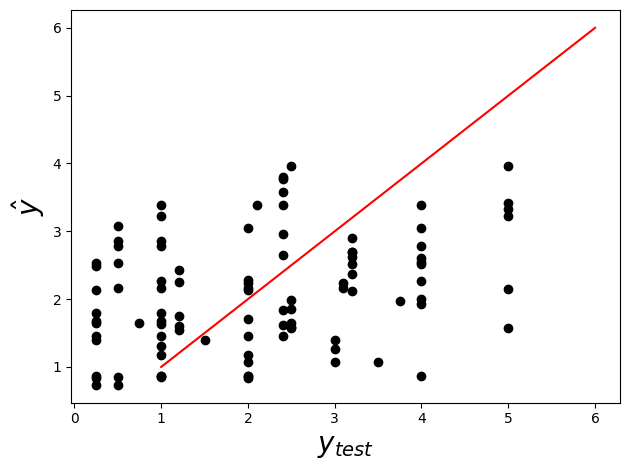

In [14]:
# Generating plot comparing predicted values to test values
from matplotlib import pyplot as plt
plt.subplots_adjust( left = 0.16, bottom = 0.15 , top = 0.85 )
plt.scatter( y_test, yhat, color='black')
plt.xlabel("$y_{test}$",fontsize = 20, weight = 'bold')
plt.ylabel("$\hat{y}$",fontsize = 20, weight = 'bold')
xx = [1,6]
yy = [1, 6]
plt.plot( xx, yy, color="red")
#plt.set_xlabel= 'y_test'
#plt.set_ylabel= 'yhat'
plt.tight_layout()
plt.savefig('Plot-compare-data-vs-fitted.png', dpi=600)

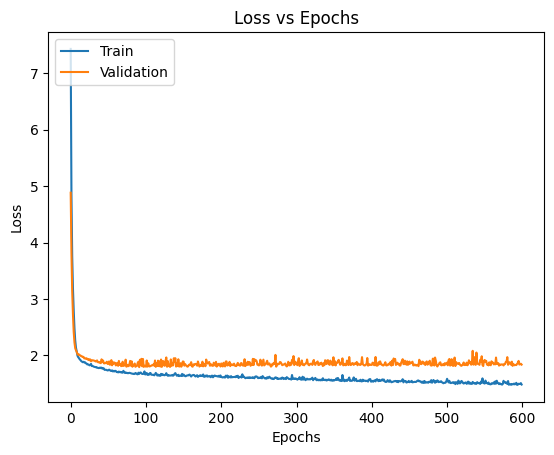

In [15]:
from matplotlib import pyplot as plt
plt.plot(m1.history['loss'])
plt.plot(m1.history['val_loss'])
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')


In [16]:
rmse(yhat,y_test)

1.612205803226954

#Pretty unsucsessful fit. Next I try to predict the total crack length (TCL) for the steel dataset

In [22]:
#TCL CNN
subdata = data[np.isfinite(data['Strain'])]
display(subdata)

,No.,C,Si,Mn,P,S,Cr,Ni,Mo,N,...,Al,Ti,V,B,Th,I,U,Ve,Strain,TCL
0,1,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
1,2,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.10
2,3,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,0.90
3,4,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,3.70
4,5,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,0.016,0.34,1.76,0.024,0.008,17.90,9.90,0.00,0.045,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.18
483,484,0.014,0.35,1.67,0.027,0.007,17.70,9.70,0.00,0.047,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00
484,485,0.014,0.33,1.73,0.026,0.007,17.90,9.50,0.00,0.046,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.24
485,486,0.050,0.75,0.94,0.026,0.007,18.30,9.40,0.00,0.016,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00


In [23]:
subdata = data[np.isfinite(data['TCL'])]
display(subdata)

,No.,C,Si,Mn,P,S,Cr,Ni,Mo,N,...,Al,Ti,V,B,Th,I,U,Ve,Strain,TCL
0,1,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
1,2,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.10
2,3,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,0.90
3,4,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,3.70
4,5,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,0.016,0.34,1.76,0.024,0.008,17.90,9.90,0.00,0.045,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.18
483,484,0.014,0.35,1.67,0.027,0.007,17.70,9.70,0.00,0.047,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00
484,485,0.014,0.33,1.73,0.026,0.007,17.90,9.50,0.00,0.046,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.24
485,486,0.050,0.75,0.94,0.026,0.007,18.30,9.40,0.00,0.016,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00


In [24]:
subdata = subdata.loc[:, 'C':'TCL']
display(subdata)

,C,Si,Mn,P,S,Cr,Ni,Mo,N,Nb,...,Al,Ti,V,B,Th,I,U,Ve,Strain,TCL
0,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,0.00,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
1,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,0.00,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.10
2,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,0.00,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,0.90
3,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,0.00,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,3.70
4,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,0.00,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0.016,0.34,1.76,0.024,0.008,17.90,9.90,0.00,0.045,0.28,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.18
483,0.014,0.35,1.67,0.027,0.007,17.70,9.70,0.00,0.047,0.28,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00
484,0.014,0.33,1.73,0.026,0.007,17.90,9.50,0.00,0.046,0.30,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.24
485,0.050,0.75,0.94,0.026,0.007,18.30,9.40,0.00,0.016,0.00,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00


In [25]:
subdata.drop("Th", axis=1, inplace=True)
subdata.drop("I", axis=1, inplace=True)
subdata.drop("U", axis=1, inplace=True)
#subdata.drop("C", axis=1, inplace=True)
#subdata.drop("Si", axis=1, inplace=True)
#subdata.drop("Mn", axis=1, inplace=True)
#subdata.drop("Nb", axis=1, inplace=True)
##subdata.drop("S", axis=1, inplace=True)
#subdata.drop("Cr", axis=1, inplace=True)
#subdata.drop("Ni", axis=1, inplace=True)
#subdata.drop("Mo", axis=1, inplace=True)
#subdata.drop("N", axis=1, inplace=True)
#subdata.drop("Co", axis=1, inplace=True)
#subdata.drop("B", axis=1, inplace=True)
subdata.drop("Ve", axis=1, inplace=True)
subdata.drop("Strain", axis=1, inplace=True)

display(subdata)

,C,Si,Mn,P,S,Cr,Ni,Mo,N,Nb,Co,Cu,Al,Ti,V,B,TCL
0,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,0.00,0.00,0.0,0.02,0.0,0.0,0.0,1.50
1,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,0.00,0.00,0.0,0.02,0.0,0.0,0.0,1.10
2,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,0.00,0.00,0.0,0.02,0.0,0.0,0.0,0.90
3,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,0.00,0.00,0.0,0.02,0.0,0.0,0.0,3.70
4,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,0.00,0.15,0.0,0.02,0.0,0.0,0.0,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0.016,0.34,1.76,0.024,0.008,17.90,9.90,0.00,0.045,0.28,0.00,0.0,0.02,0.0,0.0,0.0,0.18
483,0.014,0.35,1.67,0.027,0.007,17.70,9.70,0.00,0.047,0.28,0.00,0.0,0.02,0.0,0.0,0.0,0.00
484,0.014,0.33,1.73,0.026,0.007,17.90,9.50,0.00,0.046,0.30,0.00,0.0,0.02,0.0,0.0,0.0,0.24
485,0.050,0.75,0.94,0.026,0.007,18.30,9.40,0.00,0.016,0.00,0.00,0.0,0.02,0.0,0.0,0.0,0.00


In [26]:
X = subdata.iloc[:, 0:15].values
y = subdata.iloc[:, 16].values
X, y = X.astype('float'), y.astype('float')
n_features = X.shape[1]

# spliting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [27]:
from tensorflow.keras.models import Sequential
model = Sequential()

from tensorflow.keras.layers import Dense
model.add(Dense(20, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

In [28]:
from sklearn.metrics import r2_score
model.compile(loss='mse', optimizer='adam')

In [29]:
mTCL = model.fit(X_train, y_train, epochs=600, batch_size=16, validation_data= (X_test, y_test), verbose=1)

Epoch 1/600
25/25 [==============================] - 1s 9ms/step - loss: 20.4850 - val_loss: 26.8308
Epoch 2/600
25/25 [==============================] - 0s 4ms/step - loss: 15.2837 - val_loss: 21.1624
Epoch 3/600
25/25 [==============================] - 0s 3ms/step - loss: 13.6676 - val_loss: 19.3810
Epoch 4/600
25/25 [==============================] - 0s 4ms/step - loss: 13.4124 - val_loss: 18.8770
Epoch 5/600
25/25 [==============================] - 0s 4ms/step - loss: 13.2792 - val_loss: 18.5516
Epoch 6/600
25/25 [==============================] - 0s 3ms/step - loss: 13.2246 - val_loss: 18.4745
Epoch 7/600
25/25 [==============================] - 0s 3ms/step - loss: 13.1344 - val_loss: 18.2202
Epoch 8/600
25/25 [==============================] - 0s 3ms/step - loss: 13.1707 - val_loss: 18.4965
Epoch 9/600
25/25 [==============================] - 0s 4ms/step - loss: 13.0341 - val_loss: 18.0911
Epoch 10/600
25/25 [==============================] - 0s 4ms/step - loss: 12.9637 - val_los

In [30]:
yhat = model.predict(X_test)
error = mean_absolute_error(y_test, yhat)
sizeXtest = np.size(X_test)
sizeXtrain = np.size(X_train)
sizeytrain = np.size(y_train)
sizeytest = np.size(y_test)
size_yhat = np.size(yhat)
print('sizes of sizeXtrain, X_test, y_test, yhat ',sizeXtrain, sizeXtest, sizeytrain, sizeytest, size_yhat)
print('X_test.shape ... ', X_test.shape)
print('MAE: %.3f' % error)

4/4 [==============================] - 0s 3ms/step
sizes of sizeXtrain, X_test, y_test, yhat  5835 1470 389 98 98
X_test.shape ...  (98, 15)
MAE: 2.047


In [31]:
# R^2 score
r2_score(y_test,yhat)

0.30685627595737497

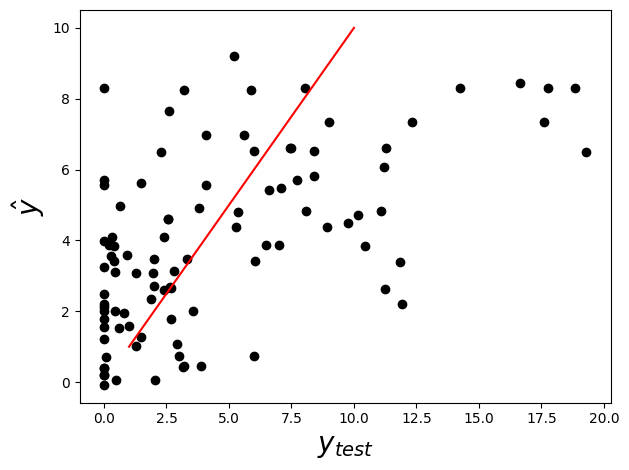

In [32]:
from matplotlib import pyplot as plt
plt.subplots_adjust( left = 0.16, bottom = 0.15 , top = 0.85 )
plt.scatter( y_test, yhat, color='black')
plt.xlabel("$y_{test}$",fontsize = 20, weight = 'bold')
plt.ylabel("$\hat{y}$",fontsize = 20, weight = 'bold')
xx = [1,10]
yy = [1, 10]
plt.plot( xx, yy, color="red")
#plt.set_xlabel= 'y_test'
#plt.set_ylabel= 'yhat'
plt.tight_layout()
plt.savefig('Plot-compare-data-vs-fitted.png', dpi=600)

#Now I try to create an ANN for the aluminum dataset which predicts the mean crack length (MCL)

In [33]:
#Al
data = pd.read_csv("/content/drive/MyDrive/Al_data.csv", sep = ",")
print(data.head())
display(data)

     Name    Si   Fe    Cu    Mn    Mg    Cr   Zn    Ti   Zr  V    B   Li  \
0  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
1  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
2  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
3  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
4  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   

      Al   U    I  Q (kJ/cm)  Speed (mm/min)  Strain    MCL  
0  94.44  25  200       30.0             100   0.142  2.738  
1  94.44  25  200       30.0             100   0.245  3.600  
2  94.44  25  200       30.0             100   0.495  4.815  
3  94.44  25  200       30.0             100   1.000  5.338  
4  94.44  25  200       30.0             100   1.997  5.492  


,Name,Si,Fe,Cu,Mn,Mg,Cr,Zn,Ti,Zr,V,B,Li,Al,U,I,Q (kJ/cm),Speed (mm/min),Strain,MCL
0,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.14200,2.738
1,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.24500,3.600
2,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.49500,4.815
3,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.00000,5.338
4,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.99700,5.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.10170,3.205
191,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.09969,2.369
192,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,2.31700,4.635
193,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,0.59890,4.550


In [34]:
subdata = data[np.isfinite(data['MCL'])]
display(subdata)

,Name,Si,Fe,Cu,Mn,Mg,Cr,Zn,Ti,Zr,V,B,Li,Al,U,I,Q (kJ/cm),Speed (mm/min),Strain,MCL
0,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.14200,2.738
1,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.24500,3.600
2,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.49500,4.815
3,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.00000,5.338
4,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.99700,5.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.10170,3.205
191,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.09969,2.369
192,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,2.31700,4.635
193,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,0.59890,4.550


In [35]:
subdata = subdata.loc[:, 'Si':'MCL']
display(subdata)

,Si,Fe,Cu,Mn,Mg,Cr,Zn,Ti,Zr,V,B,Li,Al,U,I,Q (kJ/cm),Speed (mm/min),Strain,MCL
0,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.14200,2.738
1,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.24500,3.600
2,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.49500,4.815
3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.00000,5.338
4,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.99700,5.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.10170,3.205
191,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.09969,2.369
192,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,2.31700,4.635
193,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,0.59890,4.550


In [36]:
subdata.drop("Q (kJ/cm)", axis=1, inplace=True)
subdata.drop("I", axis=1, inplace=True)
subdata.drop("U", axis=1, inplace=True)
subdata.drop("Strain", axis=1, inplace=True)
subdata.drop("Speed (mm/min)", axis=1, inplace=True)
display(subdata)

,Si,Fe,Cu,Mn,Mg,Cr,Zn,Ti,Zr,V,B,Li,Al,MCL
0,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,2.738
1,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,3.600
2,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,4.815
3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,5.338
4,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,5.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,3.205
191,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,2.369
192,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,4.635
193,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,4.550


In [37]:
X = subdata.iloc[:, 0:13].values
y = subdata.iloc[:, 13].values
X, y = X.astype('float'), y.astype('float')
n_features = X.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


In [38]:
from tensorflow.keras.models import Sequential
model = Sequential()

from tensorflow.keras.layers import Dense
model.add(Dense(20, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

In [39]:
from sklearn.metrics import r2_score
model.compile(loss='mse', optimizer='adam')

In [40]:
m2 = model.fit(X_train, y_train, epochs=600, batch_size=16, validation_data= (X_test, y_test), verbose=1)

Epoch 1/600
10/10 [==============================] - 1s 21ms/step - loss: 296.2196 - val_loss: 129.6289
Epoch 2/600
10/10 [==============================] - 0s 5ms/step - loss: 85.1996 - val_loss: 21.1060
Epoch 3/600
10/10 [==============================] - 0s 7ms/step - loss: 13.3373 - val_loss: 6.7165
Epoch 4/600
10/10 [==============================] - 0s 7ms/step - loss: 7.9821 - val_loss: 13.3271
Epoch 5/600
10/10 [==============================] - 0s 6ms/step - loss: 10.1872 - val_loss: 11.0293
Epoch 6/600
10/10 [==============================] - 0s 5ms/step - loss: 7.5565 - val_loss: 6.9297
Epoch 7/600
10/10 [==============================] - 0s 5ms/step - loss: 6.2565 - val_loss: 5.7641
Epoch 8/600
10/10 [==============================] - 0s 7ms/step - loss: 6.3178 - val_loss: 5.6086
Epoch 9/600
10/10 [==============================] - 0s 6ms/step - loss: 6.1880 - val_loss: 5.8410
Epoch 10/600
10/10 [==============================] - 0s 6ms/step - loss: 6.0633 - val_loss: 6.001

In [41]:
yhat = model.predict(X_test)
error = mean_absolute_error(y_test, yhat)
sizeXtest = np.size(X_test)
sizeXtrain = np.size(X_train)
sizeytrain = np.size(y_train)
sizeytest = np.size(y_test)
size_yhat = np.size(yhat)
print('sizes of sizeXtrain, X_test, y_test, yhat ',sizeXtrain, sizeXtest, sizeytrain, sizeytest, size_yhat)
print('X_test.shape ... ', X_test.shape)
print('MAE: %.3f' % error)

2/2 [==============================] - 0s 5ms/step
sizes of sizeXtrain, X_test, y_test, yhat  2028 507 156 39 39
X_test.shape ...  (39, 13)
MAE: 1.488


In [42]:
#Checking R^2 of model
r2_score(y_test,yhat)

0.6830601502543086

In [43]:
rmse(yhat,y_test)

2.956116002659473

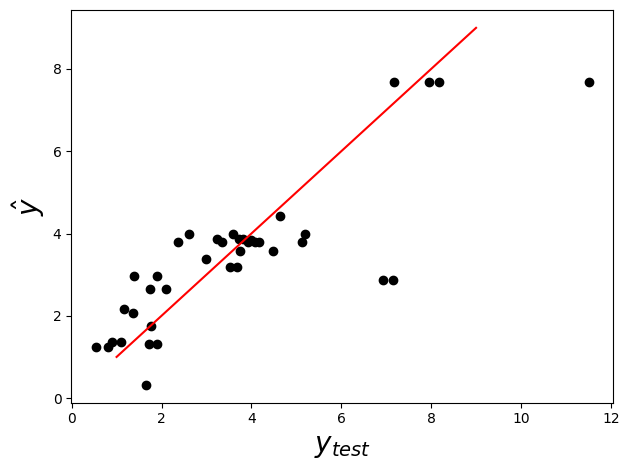

In [44]:
from matplotlib import pyplot as plt
plt.subplots_adjust( left = 0.16, bottom = 0.15 , top = 0.85 )
plt.scatter( y_test, yhat, color='black')
plt.xlabel("$y_{test}$",fontsize = 20, weight = 'bold')
plt.ylabel("$\hat{y}$",fontsize = 20, weight = 'bold')
xx = [1,9]
yy = [1, 9]
plt.plot( xx, yy, color="red")
plt.tight_layout()
plt.savefig('Plot-compare-data-vs-fitted.png', dpi=600)

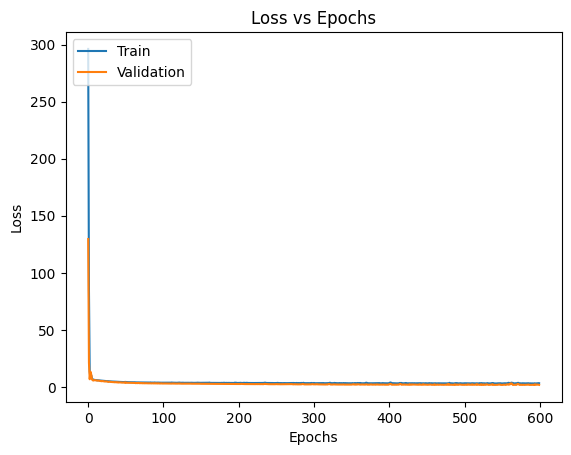

In [45]:
plt.plot(m2.history['loss'])
plt.plot(m2.history['val_loss'])
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')


In [47]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

#Trying a final ANN using reduced number of alloying percentages. Alloys to used were chosen based on the information gained from the Prinicpal Component Analysis in part 1.

In [67]:
#Using only the elements deduced from PCA
data = pd.read_csv("/content/drive/MyDrive/Al_data.csv", sep = ",")
print(data.head())
display(data)

     Name    Si   Fe    Cu    Mn    Mg    Cr   Zn    Ti   Zr  V    B   Li  \
0  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
1  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
2  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
3  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
4  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   

      Al   U    I  Q (kJ/cm)  Speed (mm/min)  Strain    MCL  
0  94.44  25  200       30.0             100   0.142  2.738  
1  94.44  25  200       30.0             100   0.245  3.600  
2  94.44  25  200       30.0             100   0.495  4.815  
3  94.44  25  200       30.0             100   1.000  5.338  
4  94.44  25  200       30.0             100   1.997  5.492  


,Name,Si,Fe,Cu,Mn,Mg,Cr,Zn,Ti,Zr,V,B,Li,Al,U,I,Q (kJ/cm),Speed (mm/min),Strain,MCL
0,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.14200,2.738
1,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.24500,3.600
2,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.49500,4.815
3,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.00000,5.338
4,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.99700,5.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.10170,3.205
191,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.09969,2.369
192,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,2.31700,4.635
193,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,0.59890,4.550


In [68]:
subdata = data[np.isfinite(data['MCL'])]
display(subdata)

,Name,Si,Fe,Cu,Mn,Mg,Cr,Zn,Ti,Zr,V,B,Li,Al,U,I,Q (kJ/cm),Speed (mm/min),Strain,MCL
0,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.14200,2.738
1,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.24500,3.600
2,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.49500,4.815
3,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.00000,5.338
4,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.99700,5.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.10170,3.205
191,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.09969,2.369
192,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,2.31700,4.635
193,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,0.59890,4.550


In [69]:
subdata = subdata.loc[:, 'Si':'MCL']
display(subdata)

,Si,Fe,Cu,Mn,Mg,Cr,Zn,Ti,Zr,V,B,Li,Al,U,I,Q (kJ/cm),Speed (mm/min),Strain,MCL
0,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.14200,2.738
1,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.24500,3.600
2,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.49500,4.815
3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.00000,5.338
4,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.99700,5.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.10170,3.205
191,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.09969,2.369
192,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,2.31700,4.635
193,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,0.59890,4.550


In [70]:
subdata.drop("Q (kJ/cm)", axis=1, inplace=True)
subdata.drop("I", axis=1, inplace=True)
subdata.drop("U", axis=1, inplace=True)
subdata.drop("Strain", axis=1, inplace=True)
subdata.drop("Speed (mm/min)", axis=1, inplace=True)
subdata.drop("Si", axis=1, inplace=True)
subdata.drop("Fe", axis=1, inplace=True)
subdata.drop("Mn", axis=1, inplace=True)
subdata.drop("Cr", axis=1, inplace=True)
subdata.drop("Zn", axis=1, inplace=True)
subdata.drop("Ti", axis=1, inplace=True)
subdata.drop("Zr", axis=1, inplace=True)
subdata.drop("V", axis=1, inplace=True)
subdata.drop("B", axis=1, inplace=True)
subdata.drop("Li", axis=1, inplace=True)
display(subdata)

,Cu,Mg,Al,MCL
0,0.02,4.39,94.44,2.738
1,0.02,4.39,94.44,3.600
2,0.02,4.39,94.44,4.815
3,0.02,4.39,94.44,5.338
4,0.02,4.39,94.44,5.492
...,...,...,...,...
190,3.00,0.02,96.70,3.205
191,3.00,0.02,96.70,2.369
192,4.96,0.04,94.67,4.635
193,4.96,0.04,94.67,4.550


In [71]:
X = subdata.iloc[:, 0:3].values
y = subdata.iloc[:, 3].values
X, y = X.astype('float'), y.astype('float')
n_features = X.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


In [72]:
from tensorflow.keras.models import Sequential
model = Sequential()

from tensorflow.keras.layers import Dense
model.add(Dense(20, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

In [73]:
from sklearn.metrics import r2_score
model.compile(loss='mse', optimizer='adam')

In [74]:
m_MCL2 = model.fit(X_train, y_train, epochs=600, batch_size=16, validation_data= (X_test, y_test), verbose=1)

Epoch 1/600
10/10 [==============================] - 1s 19ms/step - loss: 4881.5898 - val_loss: 2757.4329
Epoch 2/600
10/10 [==============================] - 0s 7ms/step - loss: 2111.7241 - val_loss: 916.0614
Epoch 3/600
10/10 [==============================] - 0s 7ms/step - loss: 637.3710 - val_loss: 160.2535
Epoch 4/600
10/10 [==============================] - 0s 7ms/step - loss: 101.7199 - val_loss: 28.5330
Epoch 5/600
10/10 [==============================] - 0s 5ms/step - loss: 30.8752 - val_loss: 67.2652
Epoch 6/600
10/10 [==============================] - 0s 5ms/step - loss: 42.9366 - val_loss: 71.8698
Epoch 7/600
10/10 [==============================] - 0s 5ms/step - loss: 36.1065 - val_loss: 48.0316
Epoch 8/600
10/10 [==============================] - 0s 5ms/step - loss: 24.9285 - val_loss: 35.4906
Epoch 9/600
10/10 [==============================] - 0s 5ms/step - loss: 23.8303 - val_loss: 30.4979
Epoch 10/600
10/10 [==============================] - 0s 6ms/step - loss: 23.794

In [75]:
yhat = model.predict(X_test)
error = mean_absolute_error(y_test, yhat)
sizeXtest = np.size(X_test)
sizeXtrain = np.size(X_train)
sizeytrain = np.size(y_train)
sizeytest = np.size(y_test)
size_yhat = np.size(yhat)
print('sizes of sizeXtrain, X_test, y_test, yhat ',sizeXtrain, sizeXtest, sizeytrain, sizeytest, size_yhat)
print('X_test.shape ... ', X_test.shape)
print('MAE: %.3f' % error)

2/2 [==============================] - 0s 5ms/step
sizes of sizeXtrain, X_test, y_test, yhat  468 117 156 39 39
X_test.shape ...  (39, 3)
MAE: 1.497


In [76]:
#Checking R^2 of model
r2_score(y_test,yhat)

0.5163769189707027

In [77]:
rmse(yhat,y_test)

2.939935787236084

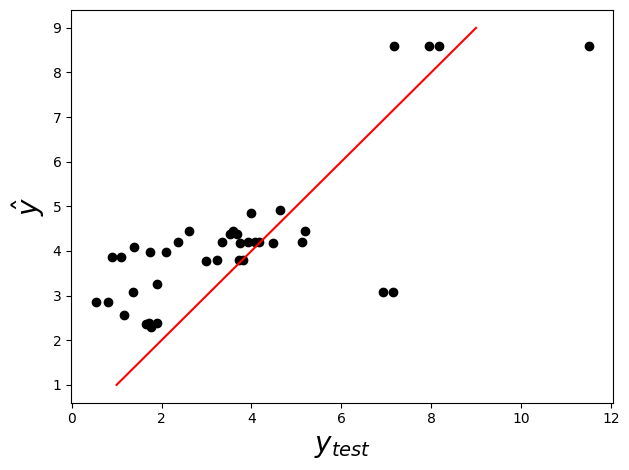

In [78]:
from matplotlib import pyplot as plt
plt.subplots_adjust( left = 0.16, bottom = 0.15 , top = 0.85 )
plt.scatter( y_test, yhat, color='black')
plt.xlabel("$y_{test}$",fontsize = 20, weight = 'bold')
plt.ylabel("$\hat{y}$",fontsize = 20, weight = 'bold')
xx = [1,9]
yy = [1, 9]
plt.plot( xx, yy, color="red")
plt.tight_layout()
plt.savefig('Plot-compare-data-vs-fitted.png', dpi=600)

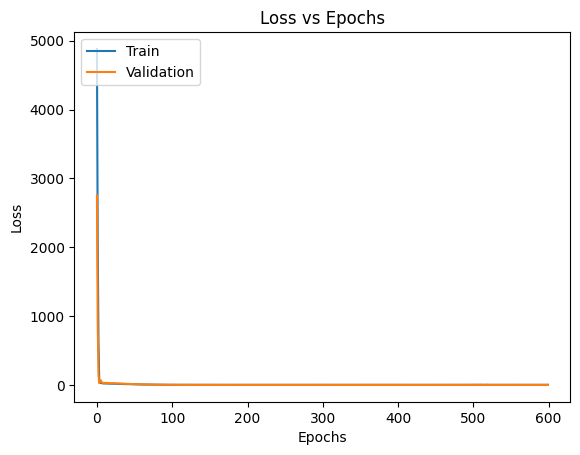

In [79]:
plt.plot(m_MCL2.history['loss'])
plt.plot(m_MCL2.history['val_loss'])
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')


# Considering the size of the dataset and the difficulties of the previous regression attempts, I now attempt Random Forest as a method that I believe has the best chance of fitting the data.

#I start with a Random Forest Regression for the Aluminum Data preducting the MCL

In [195]:
#Random Forst
data = pd.read_csv("/content/drive/MyDrive/Al_data.csv", sep = ",")
print(data.head())
display(data)
import numpy as np
import pandas as pd
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
%matplotlib inline
!conda info

     Name    Si   Fe    Cu    Mn    Mg    Cr   Zn    Ti   Zr  V    B   Li  \
0  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
1  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
2  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
3  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
4  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   

      Al   U    I  Q (kJ/cm)  Speed (mm/min)  Strain    MCL  
0  94.44  25  200       30.0             100   0.142  2.738  
1  94.44  25  200       30.0             100   0.245  3.600  
2  94.44  25  200       30.0             100   0.495  4.815  
3  94.44  25  200       30.0             100   1.000  5.338  
4  94.44  25  200       30.0             100   1.997  5.492  


,Name,Si,Fe,Cu,Mn,Mg,Cr,Zn,Ti,Zr,V,B,Li,Al,U,I,Q (kJ/cm),Speed (mm/min),Strain,MCL
0,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.14200,2.738
1,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.24500,3.600
2,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.49500,4.815
3,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.00000,5.338
4,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.99700,5.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.10170,3.205
191,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.09969,2.369
192,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,2.31700,4.635
193,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,0.59890,4.550


/bin/bash: line 1: conda: command not found


In [196]:
#Random Forst
data = pd.read_csv("/content/drive/MyDrive/Al_data.csv", sep = ",")
print(data.head())
display(data)

     Name    Si   Fe    Cu    Mn    Mg    Cr   Zn    Ti   Zr  V    B   Li  \
0  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
1  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
2  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
3  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
4  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   

      Al   U    I  Q (kJ/cm)  Speed (mm/min)  Strain    MCL  
0  94.44  25  200       30.0             100   0.142  2.738  
1  94.44  25  200       30.0             100   0.245  3.600  
2  94.44  25  200       30.0             100   0.495  4.815  
3  94.44  25  200       30.0             100   1.000  5.338  
4  94.44  25  200       30.0             100   1.997  5.492  


,Name,Si,Fe,Cu,Mn,Mg,Cr,Zn,Ti,Zr,V,B,Li,Al,U,I,Q (kJ/cm),Speed (mm/min),Strain,MCL
0,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.14200,2.738
1,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.24500,3.600
2,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.49500,4.815
3,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.00000,5.338
4,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.99700,5.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.10170,3.205
191,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.09969,2.369
192,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,2.31700,4.635
193,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,0.59890,4.550


In [197]:
subdata = data[np.isfinite(data['MCL'])]
display(subdata)

,Name,Si,Fe,Cu,Mn,Mg,Cr,Zn,Ti,Zr,V,B,Li,Al,U,I,Q (kJ/cm),Speed (mm/min),Strain,MCL
0,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.14200,2.738
1,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.24500,3.600
2,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.49500,4.815
3,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.00000,5.338
4,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.99700,5.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.10170,3.205
191,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.09969,2.369
192,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,2.31700,4.635
193,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,0.59890,4.550


In [198]:
subdata = subdata.loc[:, 'Si':'MCL']
display(subdata)

,Si,Fe,Cu,Mn,Mg,Cr,Zn,Ti,Zr,V,B,Li,Al,U,I,Q (kJ/cm),Speed (mm/min),Strain,MCL
0,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.14200,2.738
1,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.24500,3.600
2,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.49500,4.815
3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.00000,5.338
4,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.99700,5.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.10170,3.205
191,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.09969,2.369
192,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,2.31700,4.635
193,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,0.59890,4.550


In [199]:
subdata.drop("Q (kJ/cm)", axis=1, inplace=True)
subdata.drop("I", axis=1, inplace=True)
subdata.drop("U", axis=1, inplace=True)
subdata.drop("Strain", axis=1, inplace=True)
subdata.drop("Speed (mm/min)", axis=1, inplace=True)
display(subdata)

,Si,Fe,Cu,Mn,Mg,Cr,Zn,Ti,Zr,V,B,Li,Al,MCL
0,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,2.738
1,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,3.600
2,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,4.815
3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,5.338
4,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,5.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,3.205
191,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,2.369
192,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,4.635
193,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,4.550


In [200]:
X = subdata.iloc[:, 0:12].values
y = subdata.iloc[:, 13].values
X, y = X.astype('float'), y.astype('float')
n_features = X.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


In [201]:
mrf = RandomForestRegressor(n_estimators = 100, n_jobs=-1, oob_score = True)
mrf.fit(X_train, y_train)
print_score(mrf)

[0.9023836141626603, 0.8924292589552518, 0.8379895923907874, 0.8578969716183815, 0.7691228119303966]


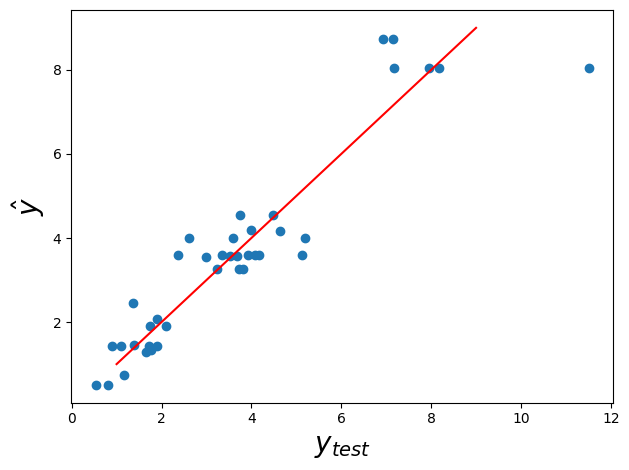

In [202]:
from matplotlib import pyplot as plt

yhat = mrf.predict(X_test)
plt.subplots_adjust( left = 0.16, bottom = 0.15 , top = 0.85 )
plt.scatter(y_test, yhat)
plt.xlabel("$y_{test}$",fontsize = 20, weight = 'bold')
plt.ylabel("$\hat{y}$",fontsize = 20, weight = 'bold')
xx = [1, 9]
yy = [1, 9]
plt.plot( xx, yy, color="red")
plt.tight_layout()

In [203]:
%time preds = np.stack([t.predict(X_test) for t in mrf.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 16.3 ms, sys: 13 µs, total: 16.3 ms
Wall time: 17.3 ms


(3.9969882487789987, 0.3873367110417642)

In [204]:
from sklearn.metrics import r2_score
r2_score(y_test,yhat)

0.8578969716183816

In [205]:
rmse(yhat,y_test)

0.8924292589552518

In [206]:
from sklearn.tree import export_graphviz
import IPython, graphviz, re
from IPython.display import display

def draw_tree(t, df, size=10, ratio=0.33, precision=0):
    """ Draws a representation of a random forest in IPython.
    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))

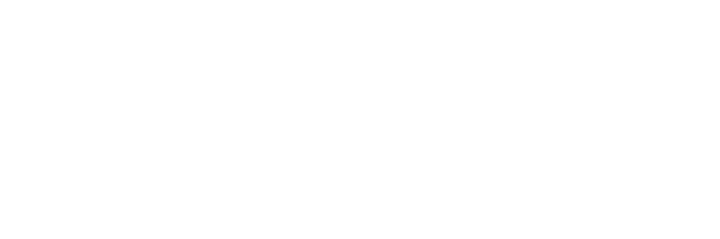

In [207]:
df_trn = subdata.iloc[:,0:12]
draw_tree(mrf.estimators_[0], df_trn, precision=3)

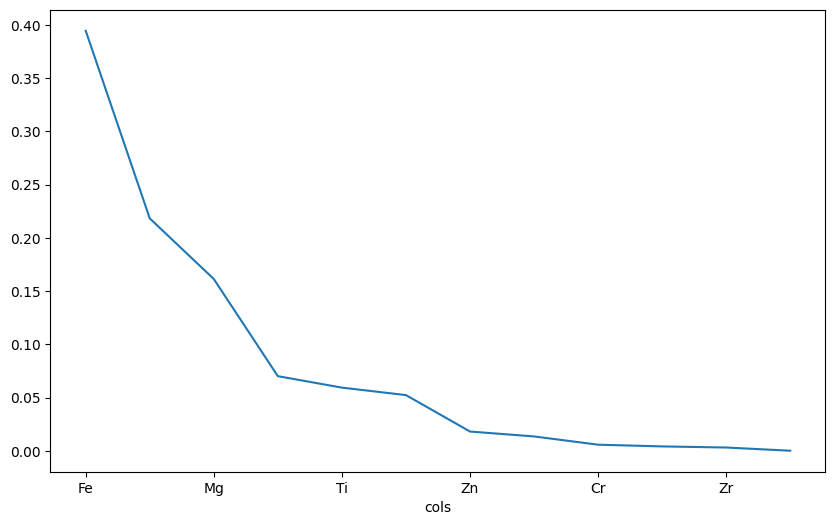

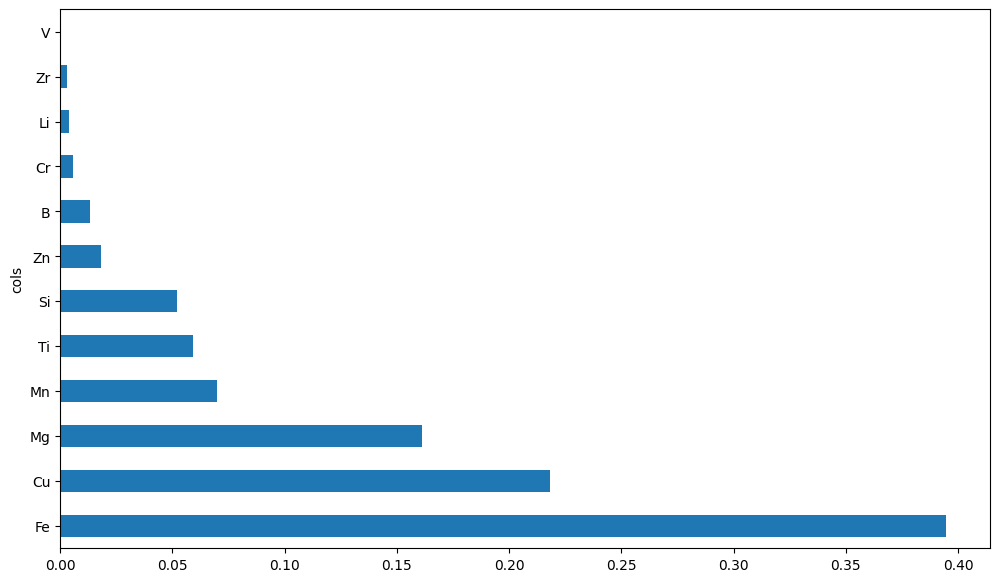

In [208]:
def rf_feat_importance(mrf, df):
    return pd.DataFrame({'cols':df.columns, 'imp':mrf.feature_importances_}
                       ).sort_values('imp', ascending=False)
fi = rf_feat_importance(mrf, df_trn); fi[:10]
fi.plot('cols', 'imp', figsize=(10,6), legend=False);
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
plot_fi(fi[:30]);

#Aluminum Data: Simplifying the Random Forest Regression by Removing elemental compositons deemed not as important from plots above.

In [209]:
#Aluminum Data: Simplfied RF
data = pd.read_csv("/content/drive/MyDrive/Al_data.csv", sep = ",")
print(data.head())
display(data)

     Name    Si   Fe    Cu    Mn    Mg    Cr   Zn    Ti   Zr  V    B   Li  \
0  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
1  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
2  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
3  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
4  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   

      Al   U    I  Q (kJ/cm)  Speed (mm/min)  Strain    MCL  
0  94.44  25  200       30.0             100   0.142  2.738  
1  94.44  25  200       30.0             100   0.245  3.600  
2  94.44  25  200       30.0             100   0.495  4.815  
3  94.44  25  200       30.0             100   1.000  5.338  
4  94.44  25  200       30.0             100   1.997  5.492  


,Name,Si,Fe,Cu,Mn,Mg,Cr,Zn,Ti,Zr,V,B,Li,Al,U,I,Q (kJ/cm),Speed (mm/min),Strain,MCL
0,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.14200,2.738
1,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.24500,3.600
2,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.49500,4.815
3,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.00000,5.338
4,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.99700,5.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.10170,3.205
191,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.09969,2.369
192,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,2.31700,4.635
193,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,0.59890,4.550


In [210]:
subdata = data[np.isfinite(data['MCL'])]
display(subdata)

,Name,Si,Fe,Cu,Mn,Mg,Cr,Zn,Ti,Zr,V,B,Li,Al,U,I,Q (kJ/cm),Speed (mm/min),Strain,MCL
0,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.14200,2.738
1,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.24500,3.600
2,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.49500,4.815
3,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.00000,5.338
4,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.99700,5.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.10170,3.205
191,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.09969,2.369
192,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,2.31700,4.635
193,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,0.59890,4.550


In [211]:
subdata = subdata.loc[:, 'Si':'MCL']
display(subdata)

,Si,Fe,Cu,Mn,Mg,Cr,Zn,Ti,Zr,V,B,Li,Al,U,I,Q (kJ/cm),Speed (mm/min),Strain,MCL
0,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.14200,2.738
1,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.24500,3.600
2,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.49500,4.815
3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.00000,5.338
4,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.99700,5.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.10170,3.205
191,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.09969,2.369
192,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,2.31700,4.635
193,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,0.59890,4.550


In [212]:
subdata.drop("Q (kJ/cm)", axis=1, inplace=True)
subdata.drop("I", axis=1, inplace=True)
subdata.drop("U", axis=1, inplace=True)
#subdata.drop("Strain", axis=1, inplace=True)
subdata.drop("Speed (mm/min)", axis=1, inplace=True)
subdata.drop("Si", axis=1, inplace=True)
#subdata.drop("Mg", axis=1, inplace=True)
subdata.drop("Fe", axis=1, inplace=True)
subdata.drop("Mn", axis=1, inplace=True)
subdata.drop("Cr", axis=1, inplace=True)
subdata.drop("Zn", axis=1, inplace=True)
subdata.drop("Ti", axis=1, inplace=True)
subdata.drop("Zr", axis=1, inplace=True)
subdata.drop("V", axis=1, inplace=True)
subdata.drop("B", axis=1, inplace=True)
subdata.drop("Li", axis=1, inplace=True)
#subdata.drop("Al", axis=1, inplace=True)

display(subdata)

,Cu,Mg,Al,Strain,MCL
0,0.02,4.39,94.44,0.14200,2.738
1,0.02,4.39,94.44,0.24500,3.600
2,0.02,4.39,94.44,0.49500,4.815
3,0.02,4.39,94.44,1.00000,5.338
4,0.02,4.39,94.44,1.99700,5.492
...,...,...,...,...,...
190,3.00,0.02,96.70,0.10170,3.205
191,3.00,0.02,96.70,0.09969,2.369
192,4.96,0.04,94.67,2.31700,4.635
193,4.96,0.04,94.67,0.59890,4.550


In [213]:
X = subdata.iloc[:, 0:3].values
y = subdata.iloc[:, 4].values
X, y = X.astype('float'), y.astype('float')
n_features = X.shape[1]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


In [214]:
mrf_reduced = RandomForestRegressor(n_estimators = 40, n_jobs=-1, oob_score = True)
mrf_reduced.fit(X_train, y_train)
print_score(mrf_reduced)

[0.9163011593213504, 0.805405944988304, 0.8447181268710282, 0.839595169833594, 0.7895824568342933]


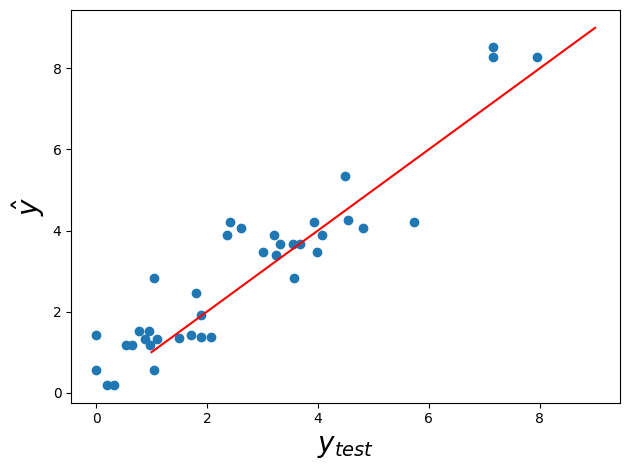

In [215]:
from matplotlib import pyplot as plt

yhat = mrf_reduced.predict(X_test)
plt.subplots_adjust( left = 0.16, bottom = 0.15 , top = 0.85 )
plt.scatter(y_test, yhat)
plt.xlabel("$y_{test}$",fontsize = 20, weight = 'bold')
plt.ylabel("$\hat{y}$",fontsize = 20, weight = 'bold')
xx = [1, 9]
yy = [1, 9]
plt.plot( xx, yy, color="red")
plt.tight_layout()

In [216]:
from sklearn.metrics import r2_score
r2_score(y_test,yhat)

0.839595169833594

In [217]:
rmse(yhat,y_test)

0.8054059449883041

Very small decrease in R^2, sucessful simplifciaiton

#Aluminum Data: Testing other Regression models


In [243]:
#Aluminum Strain Random Forest Regression
data = pd.read_csv("/content/drive/MyDrive/Al_data.csv", sep = ",")
print(data.head())
display(data)

     Name    Si   Fe    Cu    Mn    Mg    Cr   Zn    Ti   Zr  V    B   Li  \
0  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
1  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
2  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
3  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   
4  5083_3  0.14  0.2  0.02  0.67  4.39  0.12  0.0  0.02  0.0  0  0.0  0.0   

      Al   U    I  Q (kJ/cm)  Speed (mm/min)  Strain    MCL  
0  94.44  25  200       30.0             100   0.142  2.738  
1  94.44  25  200       30.0             100   0.245  3.600  
2  94.44  25  200       30.0             100   0.495  4.815  
3  94.44  25  200       30.0             100   1.000  5.338  
4  94.44  25  200       30.0             100   1.997  5.492  


,Name,Si,Fe,Cu,Mn,Mg,Cr,Zn,Ti,Zr,V,B,Li,Al,U,I,Q (kJ/cm),Speed (mm/min),Strain,MCL
0,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.14200,2.738
1,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.24500,3.600
2,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.49500,4.815
3,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.00000,5.338
4,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.99700,5.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.10170,3.205
191,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.09969,2.369
192,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,2.31700,4.635
193,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,0.59890,4.550


In [244]:
subdata = data[np.isfinite(data['Strain'])]
display(subdata)

,Name,Si,Fe,Cu,Mn,Mg,Cr,Zn,Ti,Zr,V,B,Li,Al,U,I,Q (kJ/cm),Speed (mm/min),Strain,MCL
0,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.14200,2.738
1,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.24500,3.600
2,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.49500,4.815
3,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.00000,5.338
4,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.99700,5.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.10170,3.205
191,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.09969,2.369
192,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,2.31700,4.635
193,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,0.59890,4.550


In [245]:
subdata = subdata.loc[:, 'Si':'Strain']
display(subdata)

,Si,Fe,Cu,Mn,Mg,Cr,Zn,Ti,Zr,V,B,Li,Al,U,I,Q (kJ/cm),Speed (mm/min),Strain
0,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.14200
1,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.24500
2,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.49500
3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.00000
4,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.99700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.10170
191,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.09969
192,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,2.31700
193,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,0.59890


In [246]:
subdata.drop("Q (kJ/cm)", axis=1, inplace=True)
subdata.drop("I", axis=1, inplace=True)
subdata.drop("U", axis=1, inplace=True)
subdata.drop("Speed (mm/min)", axis=1, inplace=True)
display(subdata)

,Si,Fe,Cu,Mn,Mg,Cr,Zn,Ti,Zr,V,B,Li,Al,Strain
0,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,0.14200
1,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,0.24500
2,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,0.49500
3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,1.00000
4,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,1.99700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,0.10170
191,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,0.09969
192,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,2.31700
193,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,0.59890


In [247]:
X = subdata.iloc[:, 0:12].values
y = subdata.iloc[:, 13].values
X, y = X.astype('float'), y.astype('float')
n_features = X.shape[1]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)


In [248]:
stnrf_al = RandomForestRegressor(n_estimators = 40, n_jobs=-1, oob_score = True)
stnrf_al.fit(X_train, y_train)
print_score(stnrf_al)

[0.7261731554594859, 0.9272713763544091, 0.095727200303372, -0.28664061163071053, -0.2606632675879661]


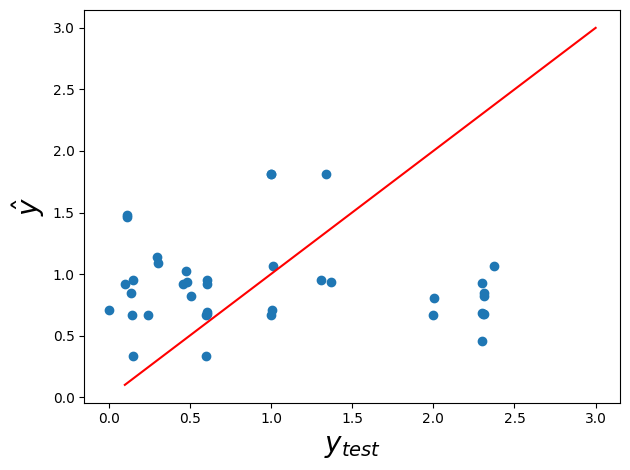

In [249]:
from matplotlib import pyplot as plt

yhat = stnrf_al.predict(X_test)
plt.subplots_adjust( left = 0.16, bottom = 0.15 , top = 0.85 )
plt.scatter(y_test, yhat)
plt.xlabel("$y_{test}$",fontsize = 20, weight = 'bold')
plt.ylabel("$\hat{y}$",fontsize = 20, weight = 'bold')
xx = [.1, 3]
yy = [.1, 3]
plt.plot( xx, yy, color="red")
plt.tight_layout()

In [250]:
r2_score(y_test,yhat)

-0.28664061163071053

In [251]:
rmse(yhat,y_test)

0.9272713763544091

In [252]:
subdata = data[np.isfinite(data['Strain'])]
display(subdata)

,Name,Si,Fe,Cu,Mn,Mg,Cr,Zn,Ti,Zr,V,B,Li,Al,U,I,Q (kJ/cm),Speed (mm/min),Strain,MCL
0,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.14200,2.738
1,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.24500,3.600
2,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.49500,4.815
3,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.00000,5.338
4,5083_3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.99700,5.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.10170,3.205
191,D,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.09969,2.369
192,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,2.31700,4.635
193,E,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,0.59890,4.550


In [253]:
subdata = subdata.loc[:, 'Si':'Strain']
display(subdata)

,Si,Fe,Cu,Mn,Mg,Cr,Zn,Ti,Zr,V,B,Li,Al,U,I,Q (kJ/cm),Speed (mm/min),Strain
0,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.14200
1,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.24500
2,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,0.49500
3,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.00000
4,0.14,0.20,0.02,0.67,4.39,0.12,0.00,0.02,0.0,0,0.0,0.0,94.44,25,200,30.0,100,1.99700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.10170
191,0.07,0.19,3.00,0.01,0.02,0.00,0.01,0.00,0.0,0,0.0,0.0,96.70,18,230,NaN,100,0.09969
192,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,2.31700
193,0.07,0.22,4.96,0.01,0.04,0.00,0.03,0.00,0.0,0,0.0,0.0,94.67,18,230,NaN,100,0.59890


In [254]:
subdata.drop("Q (kJ/cm)", axis=1, inplace=True)
subdata.drop("I", axis=1, inplace=True)
subdata.drop("U", axis=1, inplace=True)
#subdata.drop("Strain", axis=1, inplace=True)
subdata.drop("Speed (mm/min)", axis=1, inplace=True)
subdata.drop("Si", axis=1, inplace=True)
subdata.drop("Mg", axis=1, inplace=True)
subdata.drop("Fe", axis=1, inplace=True)
subdata.drop("Mn", axis=1, inplace=True)
subdata.drop("Cr", axis=1, inplace=True)
#subdata.drop("Zn", axis=1, inplace=True)
#subdata.drop("Ti", axis=1, inplace=True)
#subdata.drop("Zr", axis=1, inplace=True)
subdata.drop("V", axis=1, inplace=True)
#subdata.drop("B", axis=1, inplace=True)
subdata.drop("Li", axis=1, inplace=True)
subdata.drop("Al", axis=1, inplace=True)
subdata.drop("Cu", axis=1, inplace=True)

display(subdata)

,Zn,Ti,Zr,B,Strain
0,0.00,0.02,0.0,0.0,0.14200
1,0.00,0.02,0.0,0.0,0.24500
2,0.00,0.02,0.0,0.0,0.49500
3,0.00,0.02,0.0,0.0,1.00000
4,0.00,0.02,0.0,0.0,1.99700
...,...,...,...,...,...
190,0.01,0.00,0.0,0.0,0.10170
191,0.01,0.00,0.0,0.0,0.09969
192,0.03,0.00,0.0,0.0,2.31700
193,0.03,0.00,0.0,0.0,0.59890


In [255]:
X = subdata.iloc[:, 0:3].values
y = subdata.iloc[:, 4].values
X, y = X.astype('float'), y.astype('float')
n_features = X.shape[1]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


In [238]:
lasso_rf = RandomForestRegressor(n_estimators = 40, n_jobs=-1, oob_score = True)
lasso_rf.fit(X_train, y_train)
print_score(lasso_rf)

[0.7313022356530817, 0.916851694947108, 0.04551761132181331, -0.15091874308392716, -0.20986818766174897]


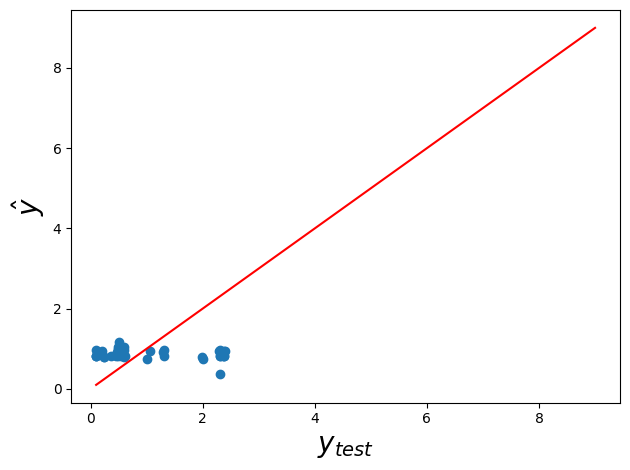

In [256]:
from matplotlib import pyplot as plt

yhat = lasso_rf.predict(X_test)
plt.subplots_adjust( left = 0.16, bottom = 0.15 , top = 0.85 )
plt.scatter(y_test, yhat)
plt.xlabel("$y_{test}$",fontsize = 20, weight = 'bold')
plt.ylabel("$\hat{y}$",fontsize = 20, weight = 'bold')
xx = [.1, 9]
yy = [.1, 9]
plt.plot( xx, yy, color="red")
plt.tight_layout()

In [257]:
r2_score(y_test,yhat)

-0.15091874308392716

#Steel Data: Total Crack Length Random Forest Regression


In [258]:
#RF for Steel dataset
data = pd.read_csv("/content/drive/MyDrive/steel_data.csv", sep = ",")
print(data.head())
display(data)

   No.      C    Si    Mn      P      S     Cr     Ni    Mo      N  ...    Al  \
0    1  0.010  0.48  1.61  0.024  0.019  17.33  10.62  2.09  0.060  ...  0.02   
1    2  0.011  0.58  1.06  0.032  0.013  16.95  10.50  2.15  0.078  ...  0.02   
2    3  0.010  0.46  1.09  0.021  0.001  17.40  11.50  2.88  0.105  ...  0.02   
3    4  0.010  0.51  1.60  0.021  0.001  17.55  12.95  2.76  0.113  ...  0.02   
4    5  0.012  0.46  1.54  0.027  0.023  16.28  10.15  2.06  0.098  ...  0.02   

    Ti    V    B    Th    I     U    Ve  Strain  TCL  
0  0.0  0.0  0.0  3.18  100  12.0  4.23     4.0  1.5  
1  0.0  0.0  0.0  3.18  100  12.0  4.23     4.0  1.1  
2  0.0  0.0  0.0  3.18  100  12.0  4.23     4.0  0.9  
3  0.0  0.0  0.0  3.18  100  12.0  4.23     4.0  3.7  
4  0.0  0.0  0.0  3.18  100  12.0  4.23     4.0  1.5  

[5 rows x 23 columns]


,No.,C,Si,Mn,P,S,Cr,Ni,Mo,N,...,Al,Ti,V,B,Th,I,U,Ve,Strain,TCL
0,1,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
1,2,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.10
2,3,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,0.90
3,4,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,3.70
4,5,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,0.016,0.34,1.76,0.024,0.008,17.90,9.90,0.00,0.045,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.18
483,484,0.014,0.35,1.67,0.027,0.007,17.70,9.70,0.00,0.047,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00
484,485,0.014,0.33,1.73,0.026,0.007,17.90,9.50,0.00,0.046,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.24
485,486,0.050,0.75,0.94,0.026,0.007,18.30,9.40,0.00,0.016,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00


In [259]:
subdata = data[np.isfinite(data['TCL'])]
display(subdata)

,No.,C,Si,Mn,P,S,Cr,Ni,Mo,N,...,Al,Ti,V,B,Th,I,U,Ve,Strain,TCL
0,1,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
1,2,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.10
2,3,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,0.90
3,4,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,3.70
4,5,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,0.016,0.34,1.76,0.024,0.008,17.90,9.90,0.00,0.045,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.18
483,484,0.014,0.35,1.67,0.027,0.007,17.70,9.70,0.00,0.047,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00
484,485,0.014,0.33,1.73,0.026,0.007,17.90,9.50,0.00,0.046,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.24
485,486,0.050,0.75,0.94,0.026,0.007,18.30,9.40,0.00,0.016,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00


In [260]:
subdata = subdata.loc[:, 'C':'TCL']
display(subdata)

,C,Si,Mn,P,S,Cr,Ni,Mo,N,Nb,...,Al,Ti,V,B,Th,I,U,Ve,Strain,TCL
0,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,0.00,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
1,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,0.00,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.10
2,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,0.00,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,0.90
3,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,0.00,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,3.70
4,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,0.00,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0.016,0.34,1.76,0.024,0.008,17.90,9.90,0.00,0.045,0.28,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.18
483,0.014,0.35,1.67,0.027,0.007,17.70,9.70,0.00,0.047,0.28,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00
484,0.014,0.33,1.73,0.026,0.007,17.90,9.50,0.00,0.046,0.30,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.24
485,0.050,0.75,0.94,0.026,0.007,18.30,9.40,0.00,0.016,0.00,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00


In [261]:
subdata.drop("Ve", axis=1, inplace=True)
subdata.drop("I", axis=1, inplace=True)
subdata.drop("U", axis=1, inplace=True)
subdata.drop("Strain", axis=1, inplace=True)
subdata.drop("Th", axis=1, inplace=True)
display(subdata)

,C,Si,Mn,P,S,Cr,Ni,Mo,N,Nb,Co,Cu,Al,Ti,V,B,TCL
0,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,0.00,0.00,0.0,0.02,0.0,0.0,0.0,1.50
1,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,0.00,0.00,0.0,0.02,0.0,0.0,0.0,1.10
2,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,0.00,0.00,0.0,0.02,0.0,0.0,0.0,0.90
3,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,0.00,0.00,0.0,0.02,0.0,0.0,0.0,3.70
4,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,0.00,0.15,0.0,0.02,0.0,0.0,0.0,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0.016,0.34,1.76,0.024,0.008,17.90,9.90,0.00,0.045,0.28,0.00,0.0,0.02,0.0,0.0,0.0,0.18
483,0.014,0.35,1.67,0.027,0.007,17.70,9.70,0.00,0.047,0.28,0.00,0.0,0.02,0.0,0.0,0.0,0.00
484,0.014,0.33,1.73,0.026,0.007,17.90,9.50,0.00,0.046,0.30,0.00,0.0,0.02,0.0,0.0,0.0,0.24
485,0.050,0.75,0.94,0.026,0.007,18.30,9.40,0.00,0.016,0.00,0.00,0.0,0.02,0.0,0.0,0.0,0.00


In [262]:
X = subdata.iloc[:, 0:15].values
y = subdata.iloc[:, 16].values
X, y = X.astype('float'), y.astype('float')
n_features = X.shape[1]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)


In [263]:
rf_stl = RandomForestRegressor(n_estimators = 40, n_jobs=-1, oob_score = True)
rf_stl.fit(X_train, y_train)
print_score(rf_stl)

[2.749920468206417, 3.338739277707416, 0.5804142121330879, 0.27843848625247625, 0.2194809081598541]


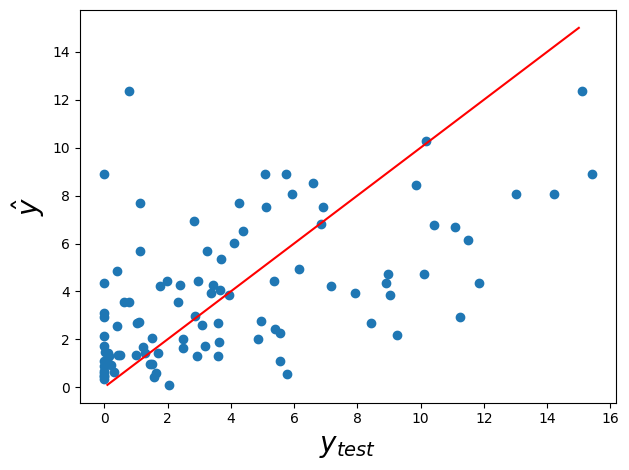

In [264]:
from matplotlib import pyplot as plt

yhat = rf_stl.predict(X_test)
plt.subplots_adjust( left = 0.16, bottom = 0.15 , top = 0.85 )
plt.scatter(y_test, yhat)
plt.xlabel("$y_{test}$",fontsize = 20, weight = 'bold')
plt.ylabel("$\hat{y}$",fontsize = 20, weight = 'bold')
xx = [.1, 15]
yy = [.1, 15]
plt.plot( xx, yy, color="red")
plt.tight_layout()

In [265]:
from sklearn.metrics import r2_score
r2_score(y_test,yhat)

0.27843848625247625

In [266]:
rmse(yhat,y_test)

3.338739277707416

#Steel Data: Strain Random Forest Regression


In [267]:
#Steel Data: Strain Random Forest Regression
data = pd.read_csv("/content/drive/MyDrive/steel_data.csv", sep = ",")
print(data.head())
display(data)

   No.      C    Si    Mn      P      S     Cr     Ni    Mo      N  ...    Al  \
0    1  0.010  0.48  1.61  0.024  0.019  17.33  10.62  2.09  0.060  ...  0.02   
1    2  0.011  0.58  1.06  0.032  0.013  16.95  10.50  2.15  0.078  ...  0.02   
2    3  0.010  0.46  1.09  0.021  0.001  17.40  11.50  2.88  0.105  ...  0.02   
3    4  0.010  0.51  1.60  0.021  0.001  17.55  12.95  2.76  0.113  ...  0.02   
4    5  0.012  0.46  1.54  0.027  0.023  16.28  10.15  2.06  0.098  ...  0.02   

    Ti    V    B    Th    I     U    Ve  Strain  TCL  
0  0.0  0.0  0.0  3.18  100  12.0  4.23     4.0  1.5  
1  0.0  0.0  0.0  3.18  100  12.0  4.23     4.0  1.1  
2  0.0  0.0  0.0  3.18  100  12.0  4.23     4.0  0.9  
3  0.0  0.0  0.0  3.18  100  12.0  4.23     4.0  3.7  
4  0.0  0.0  0.0  3.18  100  12.0  4.23     4.0  1.5  

[5 rows x 23 columns]


,No.,C,Si,Mn,P,S,Cr,Ni,Mo,N,...,Al,Ti,V,B,Th,I,U,Ve,Strain,TCL
0,1,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
1,2,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.10
2,3,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,0.90
3,4,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,3.70
4,5,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,0.016,0.34,1.76,0.024,0.008,17.90,9.90,0.00,0.045,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.18
483,484,0.014,0.35,1.67,0.027,0.007,17.70,9.70,0.00,0.047,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00
484,485,0.014,0.33,1.73,0.026,0.007,17.90,9.50,0.00,0.046,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.24
485,486,0.050,0.75,0.94,0.026,0.007,18.30,9.40,0.00,0.016,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00


In [268]:
subdata = data[np.isfinite(data['Strain'])]
display(subdata)

,No.,C,Si,Mn,P,S,Cr,Ni,Mo,N,...,Al,Ti,V,B,Th,I,U,Ve,Strain,TCL
0,1,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
1,2,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.10
2,3,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,0.90
3,4,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,3.70
4,5,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,0.016,0.34,1.76,0.024,0.008,17.90,9.90,0.00,0.045,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.18
483,484,0.014,0.35,1.67,0.027,0.007,17.70,9.70,0.00,0.047,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00
484,485,0.014,0.33,1.73,0.026,0.007,17.90,9.50,0.00,0.046,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.24
485,486,0.050,0.75,0.94,0.026,0.007,18.30,9.40,0.00,0.016,...,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2,0.00


In [269]:
subdata = subdata.loc[:, 'C':'Strain']
display(subdata)

,C,Si,Mn,P,S,Cr,Ni,Mo,N,Nb,...,Cu,Al,Ti,V,B,Th,I,U,Ve,Strain
0,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,0.00,...,0.0,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0
1,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,0.00,...,0.0,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0
2,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,0.00,...,0.0,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0
3,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,0.00,...,0.0,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0
4,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,0.00,...,0.0,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0.016,0.34,1.76,0.024,0.008,17.90,9.90,0.00,0.045,0.28,...,0.0,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2
483,0.014,0.35,1.67,0.027,0.007,17.70,9.70,0.00,0.047,0.28,...,0.0,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2
484,0.014,0.33,1.73,0.026,0.007,17.90,9.50,0.00,0.046,0.30,...,0.0,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2
485,0.050,0.75,0.94,0.026,0.007,18.30,9.40,0.00,0.016,0.00,...,0.0,0.02,0.0,0.0,0.0,5.00,70,16.0,1.25,1.2


In [270]:
subdata.drop("Ve", axis=1, inplace=True)
subdata.drop("I", axis=1, inplace=True)
subdata.drop("U", axis=1, inplace=True)
subdata.drop("Th", axis=1, inplace=True)
display(subdata)

,C,Si,Mn,P,S,Cr,Ni,Mo,N,Nb,Co,Cu,Al,Ti,V,B,Strain
0,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,0.00,0.00,0.0,0.02,0.0,0.0,0.0,4.0
1,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,0.00,0.00,0.0,0.02,0.0,0.0,0.0,4.0
2,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,0.00,0.00,0.0,0.02,0.0,0.0,0.0,4.0
3,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,0.00,0.00,0.0,0.02,0.0,0.0,0.0,4.0
4,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,0.00,0.15,0.0,0.02,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0.016,0.34,1.76,0.024,0.008,17.90,9.90,0.00,0.045,0.28,0.00,0.0,0.02,0.0,0.0,0.0,1.2
483,0.014,0.35,1.67,0.027,0.007,17.70,9.70,0.00,0.047,0.28,0.00,0.0,0.02,0.0,0.0,0.0,1.2
484,0.014,0.33,1.73,0.026,0.007,17.90,9.50,0.00,0.046,0.30,0.00,0.0,0.02,0.0,0.0,0.0,1.2
485,0.050,0.75,0.94,0.026,0.007,18.30,9.40,0.00,0.016,0.00,0.00,0.0,0.02,0.0,0.0,0.0,1.2


In [271]:
X = subdata.iloc[:, 0:15].values
y = subdata.iloc[:, 16].values
X, y = X.astype('float'), y.astype('float')
n_features = X.shape[1]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)


In [272]:
rf_stl2 = RandomForestRegressor(n_estimators = 40, n_jobs=-1, oob_score = True)
rf_stl2.fit(X_train, y_train)
print_score(rf_stl2)

[1.0219363814201965, 1.3007409465518878, 0.47218419332317785, 0.1311774330993838, -0.021124181137783138]


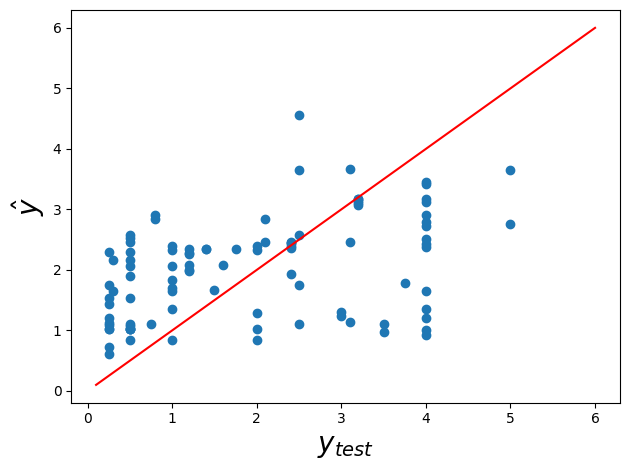

In [273]:
from matplotlib import pyplot as plt

yhat = rf_stl2.predict(X_test)
plt.subplots_adjust( left = 0.16, bottom = 0.15 , top = 0.85 )
plt.scatter(y_test, yhat)
plt.xlabel("$y_{test}$",fontsize = 20, weight = 'bold')
plt.ylabel("$\hat{y}$",fontsize = 20, weight = 'bold')
xx = [.1, 6]
yy = [.1, 6]
plt.plot( xx, yy, color="red")
plt.tight_layout()

In [274]:
#R^2 value
from sklearn.metrics import r2_score
r2_score(y_test,yhat)

0.1311774330993838

In [275]:
#RMSE Value
rmse(yhat,y_test)

1.3007409465518878